DecisionTreeClassifier Accuracy: 0.6647
RandomForestClassifier Accuracy: 0.7402
LogisticRegression Accuracy: 0.6994
KNeighborsClassifier Accuracy: 0.6918
SVC Accuracy: 0.6918


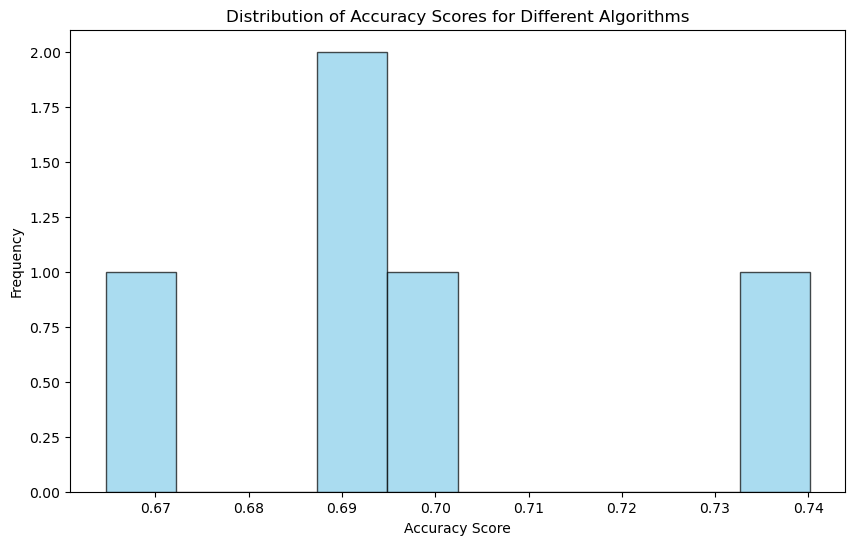

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder  # Add this import
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/MitaliP001/patient-treatment-classification/main/training_set.csv"
data = pd.read_csv(url)

# Encode categorical variables
label_encoder = LabelEncoder()
data['SEX'] = label_encoder.fit_transform(data['SEX'])

# Separate features and target variable
X = data[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX']]
y = data['SOURCE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
knn_model = KNeighborsClassifier()
svm_model = SVC(probability=True, random_state=42)

# Train the models
models = [dt_model, rf_model, lr_model, knn_model, svm_model]
accuracy_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")

# Plot histogram for accuracy scores
plt.figure(figsize=(10, 6))
plt.hist(accuracy_scores, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Accuracy Scores for Different Algorithms')
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.show()
